In [1]:
%load_ext autoreload
%autoreload 2

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

In [ ]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74/te_counts",
)

In [ ]:
omic_data_loaders = {
    # "mrna": mrna_loader,
    # "mirna": mirna_loader,
    # "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

save_folder = f"logs/mds_disease/mds_disease_{'_'.join(omic_data_loaders.keys())}.csv"
save_folder

'logs/mds_disease/mds_disease_te.csv'

In [ ]:
from src.evals.knn import KNNEvaluator

knn_eval = KNNEvaluator(
    data_manager=odm,
    n_trials=20,
    verbose=True,
    params={"k_lb": 1, "k_ub": 20},
)
_ = knn_eval.evaluate()
knn_eval.save_results(results_file=save_folder, row_name="knn")

[I 2024-11-14 13:01:00,120] A new study created in memory with name: no-name-e7bff091-bee4-44c3-94ba-29bdbe47c411
[I 2024-11-14 13:01:00,198] Trial 0 finished with value: 0.5085070524273005 and parameters: {'n_neighbors': 10}. Best is trial 0 with value: 0.5085070524273005.
[I 2024-11-14 13:01:00,264] Trial 1 finished with value: 0.27794757275052406 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 0.5085070524273005.
[I 2024-11-14 13:01:00,329] Trial 2 finished with value: 0.27794757275052406 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 0.5085070524273005.
[I 2024-11-14 13:01:00,395] Trial 3 finished with value: 0.4477242436013849 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 0.5085070524273005.


New best score: 0.509
Best model performance:
Accuracy: 0.879 ± 0.025
F1 Macro: 0.682 ± 0.116
F1 Weighted: 0.848 ± 0.038


[I 2024-11-14 13:01:00,464] Trial 4 finished with value: 0.32661842676062103 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.5085070524273005.
[I 2024-11-14 13:01:00,527] Trial 5 finished with value: 0.27794757275052406 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 0.5085070524273005.
[I 2024-11-14 13:01:00,590] Trial 6 finished with value: 0.27794757275052406 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 0.5085070524273005.
[I 2024-11-14 13:01:00,652] Trial 7 finished with value: 0.27794757275052406 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 0.5085070524273005.
[I 2024-11-14 13:01:00,714] Trial 8 finished with value: 0.32661842676062103 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.5085070524273005.
[I 2024-11-14 13:01:00,776] Trial 9 finished with value: 0.6139268814359082 and parameters: {'n_neighbors': 3}. Best is trial 9 with value: 0.6139268814359082.
[I 2024-11-14 13:01:00,875] Tr

New best score: 0.614
Best model performance:
Accuracy: 0.892 ± 0.032
F1 Macro: 0.782 ± 0.064
F1 Weighted: 0.880 ± 0.041


[I 2024-11-14 13:01:01,007] Trial 12 finished with value: 0.46772551930590295 and parameters: {'n_neighbors': 7}. Best is trial 9 with value: 0.6139268814359082.
[I 2024-11-14 13:01:01,071] Trial 13 finished with value: 0.5296409475158396 and parameters: {'n_neighbors': 8}. Best is trial 9 with value: 0.6139268814359082.
[I 2024-11-14 13:01:01,135] Trial 14 finished with value: 0.6528081564994511 and parameters: {'n_neighbors': 6}. Best is trial 14 with value: 0.6528081564994511.
[I 2024-11-14 13:01:01,199] Trial 15 finished with value: 0.6139268814359082 and parameters: {'n_neighbors': 3}. Best is trial 14 with value: 0.6528081564994511.
[I 2024-11-14 13:01:01,264] Trial 16 finished with value: 0.6528081564994511 and parameters: {'n_neighbors': 5}. Best is trial 14 with value: 0.6528081564994511.
[I 2024-11-14 13:01:01,334] Trial 17 finished with value: 0.6528081564994511 and parameters: {'n_neighbors': 6}. Best is trial 14 with value: 0.6528081564994511.


New best score: 0.653
Best model performance:
Accuracy: 0.907 ± 0.053
F1 Macro: 0.806 ± 0.106
F1 Weighted: 0.893 ± 0.062


[I 2024-11-14 13:01:01,403] Trial 18 finished with value: 0.5085070524273005 and parameters: {'n_neighbors': 10}. Best is trial 14 with value: 0.6528081564994511.
[I 2024-11-14 13:01:01,469] Trial 19 finished with value: 0.6528081564994511 and parameters: {'n_neighbors': 5}. Best is trial 14 with value: 0.6528081564994511.
[I 2024-11-14 13:01:01,470] A new study created in memory with name: no-name-39c8076c-fcec-4692-ab9d-dba5ce98c8d0
[I 2024-11-14 13:01:01,541] Trial 0 finished with value: 0.5809969155423703 and parameters: {'C': 0.027203803863838624, 'class_weight': 'balanced', 'rfe_step': 0.16047342946164844, 'rfe_n_features': 181}. Best is trial 0 with value: 0.5809969155423703.
[I 2024-11-14 13:01:01,615] Trial 1 finished with value: 0.5614209168802691 and parameters: {'C': 0.01808785237908672, 'class_weight': 'balanced', 'rfe_step': 0.10392392789249999, 'rfe_n_features': 176}. Best is trial 0 with value: 0.5809969155423703.
[I 2024-11-14 13:01:01,675] Trial 2 finished with value:

New best score: 0.581
Best model performance:
Accuracy: 0.867 ± 0.084
F1 Macro: 0.775 ± 0.120
F1 Weighted: 0.865 ± 0.079


[I 2024-11-14 13:01:01,794] Trial 3 finished with value: 0.7389770960193865 and parameters: {'C': 0.25817777503003897, 'class_weight': None, 'rfe_step': 0.13820158797311796, 'rfe_n_features': 119}. Best is trial 3 with value: 0.7389770960193865.
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterati

New best score: 0.739
Best model performance:
Accuracy: 0.933 ± 0.042
F1 Macro: 0.857 ± 0.094
F1 Weighted: 0.924 ± 0.051


[I 2024-11-14 13:01:02,145] Trial 5 finished with value: 0.7039337563024542 and parameters: {'C': 0.6319302254447319, 'class_weight': 'balanced', 'rfe_step': 0.11227973720404164, 'rfe_n_features': 126}. Best is trial 3 with value: 0.7389770960193865.
[I 2024-11-14 13:01:02,274] Trial 6 finished with value: 0.7389770960193865 and parameters: {'C': 0.8660283351283377, 'class_weight': None, 'rfe_step': 0.16250197355361073, 'rfe_n_features': 164}. Best is trial 3 with value: 0.7389770960193865.
[I 2024-11-14 13:01:02,497] Trial 7 finished with value: 0.669993140387569 and parameters: {'C': 0.19390436048362267, 'class_weight': 'balanced', 'rfe_step': 0.06296156664023142, 'rfe_n_features': 111}. Best is trial 3 with value: 0.7389770960193865.
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-pac

New best score: 0.753
Best model performance:
Accuracy: 0.933 ± 0.042
F1 Macro: 0.870 ± 0.092
F1 Weighted: 0.927 ± 0.052


[I 2024-11-14 13:01:06,171] Trial 3 finished with value: 0.7389770960193865 and parameters: {'lambda': 0.01694761860106469, 'alpha': 1.4864468309677284e-05}. Best is trial 0 with value: 0.7526861283892176.
[I 2024-11-14 13:01:06,259] Trial 4 finished with value: 0.553150014770979 and parameters: {'lambda': 0.030960126688156214, 'alpha': 0.0473458448805854}. Best is trial 0 with value: 0.7526861283892176.
[I 2024-11-14 13:01:06,348] Trial 5 finished with value: 0.27794757275052406 and parameters: {'lambda': 2.6701102970387854e-07, 'alpha': 0.6694793346250602}. Best is trial 0 with value: 0.7526861283892176.
[I 2024-11-14 13:01:06,454] Trial 6 finished with value: 0.7389770960193865 and parameters: {'lambda': 2.204321254027931e-06, 'alpha': 0.0264702001022464}. Best is trial 0 with value: 0.7526861283892176.
[I 2024-11-14 13:01:06,553] Trial 7 finished with value: 0.553150014770979 and parameters: {'lambda': 0.04626876857643086, 'alpha': 0.042348611253685685}. Best is trial 0 with value:

New best score: 0.797
Best model performance:
Accuracy: 0.947 ± 0.050
F1 Macro: 0.894 ± 0.106
F1 Weighted: 0.941 ± 0.059


[I 2024-11-14 13:01:09,873] Trial 40 finished with value: 0.7526861283892176 and parameters: {'lambda': 6.052428990708667e-05, 'alpha': 1.1933602260962324e-05}. Best is trial 37 with value: 0.7966829243918474.
[I 2024-11-14 13:01:09,978] Trial 41 finished with value: 0.7526861283892176 and parameters: {'lambda': 4.3825441752949765e-06, 'alpha': 2.1328527830188963e-08}. Best is trial 37 with value: 0.7966829243918474.
[I 2024-11-14 13:01:10,074] Trial 42 finished with value: 0.7526861283892176 and parameters: {'lambda': 2.872659858507051e-05, 'alpha': 4.377963266123595e-07}. Best is trial 37 with value: 0.7966829243918474.
[I 2024-11-14 13:01:10,169] Trial 43 finished with value: 0.7526861283892176 and parameters: {'lambda': 0.00029039857179555636, 'alpha': 6.607391893569826e-08}. Best is trial 37 with value: 0.7966829243918474.
[I 2024-11-14 13:01:10,260] Trial 44 finished with value: 0.7526861283892176 and parameters: {'lambda': 1.8588986711453626e-06, 'alpha': 2.15154443593222e-07}. 

New best score: 0.704
Best model performance:
Accuracy: 0.920 ± 0.050
F1 Macro: 0.840 ± 0.097
F1 Weighted: 0.911 ± 0.056


`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/lubojjan/DiplomaGeneral/.venv/lib/python3.12/site-pa

Results saved to logs/mds_disease/mds_disease_te.csv

Epoch: 101:
Train Loss: 0.2859, Train Acc: 0.9322, Train F1 Macro: 0.8554, Train F1 Weighted: 0.9251
Val Acc: 0.8667, Val F1 Macro: 0.7115, Val F1 Weighted: 0.8385, Val Geometric Mean: 0.8026
Test Acc: 0.8667, Test F1 Macro: 0.7115, Test F1 Weighted: 0.8385
##################################################

Epoch: 101:
Train Loss: 0.2600, Train Acc: 0.9322, Train F1 Macro: 0.8554, Train F1 Weighted: 0.9251
Val Acc: 0.8667, Val F1 Macro: 0.7115, Val F1 Weighted: 0.8385, Val Geometric Mean: 0.8026
Test Acc: 0.8667, Test F1 Macro: 0.7115, Test F1 Weighted: 0.8385
##################################################

Epoch: 101:
Train Loss: 0.3707, Train Acc: 0.8475, Train F1 Macro: 0.5489, Train F1 Weighted: 0.7915
Val Acc: 0.8667, Val F1 Macro: 0.7115, Val F1 Weighted: 0.8385, Val Geometric Mean: 0.8026
Test Acc: 0.8667, Test F1 Macro: 0.7115, Test F1 Weighted: 0.8385
##################################################

Epoch: 101:
Trai

[I 2024-11-14 13:01:32,206] Trial 0 finished with value: 0.6862235118921005 and parameters: {}. Best is trial 0 with value: 0.6862235118921005.
[I 2024-11-14 13:01:32,246] A new study created in memory with name: no-name-dc528e16-61f4-4f53-b290-a7c4cf544e9d


New best score: 0.686
Best model performance:
Accuracy: 0.920 ± 0.050
F1 Macro: 0.824 ± 0.109
F1 Weighted: 0.906 ± 0.061

Epoch: 050:
Train Loss: 0.4637, Train Acc: 0.8305, Train F1 Macro: 0.4537, Train F1 Weighted: 0.7536
Val Acc: 0.8000, Val F1 Macro: 0.4444, Val F1 Weighted: 0.7111, Val Geometric Mean: 0.6323
Test Acc: 0.8000, Test F1 Macro: 0.4444, Test F1 Weighted: 0.7111
##################################################

Epoch: 100:
Train Loss: 0.4587, Train Acc: 0.8305, Train F1 Macro: 0.4537, Train F1 Weighted: 0.7536
Val Acc: 0.8000, Val F1 Macro: 0.4444, Val F1 Weighted: 0.7111, Val Geometric Mean: 0.6323
Test Acc: 0.8000, Test F1 Macro: 0.4444, Test F1 Weighted: 0.7111
##################################################

Epoch: 150:
Train Loss: 0.4380, Train Acc: 0.8305, Train F1 Macro: 0.4537, Train F1 Weighted: 0.7536
Val Acc: 0.8000, Val F1 Macro: 0.4444, Val F1 Weighted: 0.7111, Val Geometric Mean: 0.6323
Test Acc: 0.8000, Test F1 Macro: 0.4444, Test F1 Weighted: 0.7111


[I 2024-11-14 13:01:48,214] Trial 0 finished with value: 0.3717283965781297 and parameters: {}. Best is trial 0 with value: 0.3717283965781297.



Epoch: 200:
Train Loss: 0.5122, Train Acc: 0.8167, Train F1 Macro: 0.4495, Train F1 Weighted: 0.7343
Val Acc: 0.8571, Val F1 Macro: 0.4615, Val F1 Weighted: 0.7912, Val Geometric Mean: 0.6790
Test Acc: 0.8571, Test F1 Macro: 0.4615, Test F1 Weighted: 0.7912
##################################################
New best score: 0.372
Best model performance:
Accuracy: 0.811 ± 0.077
F1 Macro: 0.586 ± 0.116
F1 Weighted: 0.781 ± 0.067


In [ ]:


from src.evals.svm import SVMEvaluator

svm_eval = SVMEvaluator(
    data_manager=odm,
    n_trials=30,
    verbose=True,
    params={
        "C_lb": 0.01,
        "C_ub": 10,
        "rfe_step_range": (0.05, 0.2),
        "rfe_n_features_range": (100, 200),
    },
    mode="linear",
)
_ = svm_eval.evaluate()
svm_eval.save_results(results_file=save_folder, row_name="svm")

In [ ]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=60,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.save_results(results_file=save_folder, row_name="xgb")

In [ ]:
from src.evals.mlp import MLPEvaluator

mlp_eval = MLPEvaluator(
    data_manager=odm,
    n_trials=10,
    verbose=True,
    params={
        "lr_range": [1e-4, 1e-2],
        "l2_lambda": 5e-4,
        "dropout_range": [0.1, 0.5],
        "hidden_channels": 64,
        "proj_dim": 64,
        "batch_size": 32,
        "max_epochs": 50,
    },
)
_ = mlp_eval.evaluate()
mlp_eval.save_results(results_file=save_folder, row_name="mlp")

In [ ]:
from src.evals.mogonet import MOGONETEvaluator
from src.data_managers.sample_graph import SampleGraphDataManager

mogonet_eval = MOGONETEvaluator(
    data_manager=SampleGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "graph_style": "threshold",
            "self_connections": True,
            "avg_degree": 5,
        },
    ),
    n_trials=1,
    params={
        "encoder_hidden_channels": {
            "mrna": 64,
            "mirna": 64,
            "circrna": 64,
            "te": 64,
        },
        "encoder_type": "gat",
        "dropout": 0.2,
        "integrator_type": "attention",
        "integration_in_dim": 16,
        "vcdn_hidden_channels": 16,
        "epochs": 200,
        "log_interval": 101,
    }
)
mogonet_eval.evaluate()
mogonet_eval.save_results(results_file=save_folder, row_name="mogonet")

In [ ]:

from src.evals.birgat import BiRGATEvaluator
from src.data_managers.bipartite_graph import BipartiteGraphDataManager

birgat_eval = BiRGATEvaluator(
    data_manager=BipartiteGraphDataManager(
        omic_data_loaders=omic_data_loaders,
        n_splits=5,
        params={
            "diff_exp_thresholds" : {
                "mrna": 1.8,
                "mirna": 1.8,
                "circrna": 1.8,
                "te": 1.8,
            },
        },
    ),
    params={
        "epochs": 200,
        "log_interval": 50,
        "hidden_channels": [200, 64, 64, 32, 32],
        "heads": 2,
        "dropout": 0.2,
        "attention_dropout": 0.2,
        "integrator_type": "attention",
        "three_layers": True,
    },
    n_trials=1,
)
birgat_eval.evaluate()
birgat_eval.save_results(results_file=save_folder, row_name="birgat")

0    0.715510
1    0.733179
2    0.771141
3    0.715510
4    0.917075
5    0.686224
Name: metric_product, dtype: float64
        acc  f1_macro  f1_weighted   acc_std  f1_macro_std  f1_weighted_std  \
0  0.919048  0.852293     0.913458  0.049670      0.096692         0.056469   
1  0.918095  0.866942     0.921154  0.030476      0.040875         0.023752   
2  0.932381  0.885986     0.933499  0.042207      0.066373         0.042300   
3  0.919048  0.852293     0.913458  0.049670      0.096692         0.056469   
4  0.973333  0.965909     0.975455  0.053333      0.068182         0.049091   
5  0.920000  0.823578     0.905676  0.049889      0.109079         0.061233   

     model  metric_product  
0      KNN        0.715510  
1      SVM        0.733179  
2  XGBoost        0.771141  
3      MLP        0.715510  
4  MOGONET        0.917075  
5   BiRGAT        0.686224  


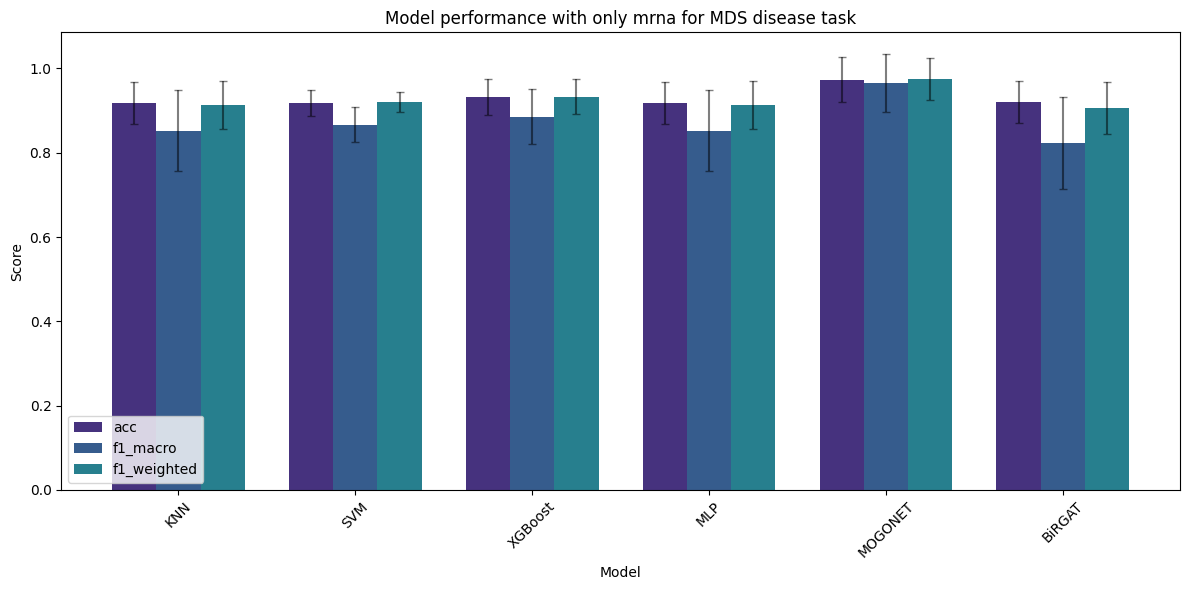

In [ ]:
import numpy as np
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_model_comparison_plot(file_path, fig_title, save_path):
    # Load data
    df = pl.read_csv(file_path).to_pandas()
    
    # Calculate product of metrics for sorting
    metrics = ['acc', 'f1_macro', 'f1_weighted']
    df['metric_product'] = df[metrics].product(axis=1)

    print(df['metric_product'])
    
    # Sort models
    df['model'] = pd.Categorical(df['model'], 
                               categories=df.sort_values('metric_product', ascending=False)['model'],
                               ordered=True)
    
    print(df)
    
    # Prepare data for plotting
    metrics_df = df.melt(id_vars=['model'], 
                        value_vars=metrics,
                        var_name='Metric', 
                        value_name='Score')
    
    std_df = df.melt(id_vars=['model'], 
                     value_vars=[m + '_std' for m in metrics],
                     value_name='Std')
    
    metrics_df['Std'] = std_df['Std']
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Calculate bar positions
    n_models = len(df['model'].unique())
    n_metrics = len(metrics)
    width = 0.25
    
    x = np.arange(n_models)
    
    # Plot bars and error bars for each metric
    for i, metric in enumerate(metrics):
        mask = metrics_df['Metric'] == metric
        plt.bar(x + i*width, 
               metrics_df[mask]['Score'], 
               width, 
               label=metric,
               color=sns.color_palette('viridis')[i])
        
        plt.errorbar(x + i*width, 
                    metrics_df[mask]['Score'],
                    yerr=metrics_df[mask]['Std'],
                    fmt='none',
                    color='black',
                    alpha=0.5,
                    capsize=3)
    
    plt.title(fig_title)
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.xticks(x + width, df['model'], rotation=45)
    plt.legend()
    plt.tight_layout()

    fig = plt.gcf()

    if save_path is not None:
        fig.savefig(save_path)

# Usage
fig = create_model_comparison_plot(
    'logs/mds_disease/mds_disease_mrna.csv',
    'Model performance with only mrna for MDS disease task',
    'plots/mds_disease_mrna.png'
)

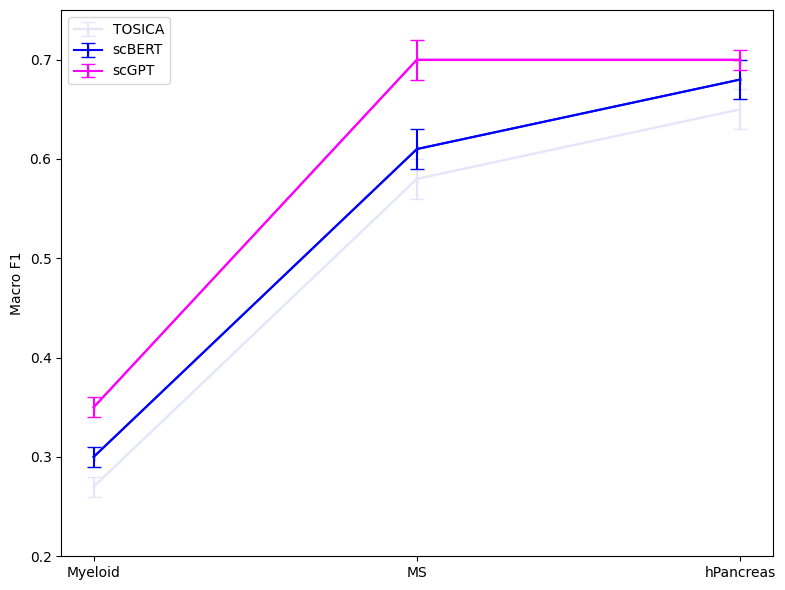

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Myeloid', 'MS', 'hPancreas']
tosica = [0.27, 0.58, 0.65]
scbert = [0.30, 0.61, 0.68]
scgpt = [0.35, 0.70, 0.70]

# Error bars (approximated from the image)
tosica_err = [0.01, 0.02, 0.02]
scbert_err = [0.01, 0.02, 0.02]
scgpt_err = [0.01, 0.02, 0.01]

# Create figure
plt.figure(figsize=(8, 6))

# Plot lines with error bars
plt.errorbar(categories, tosica, yerr=tosica_err, label='TOSICA', color='lavender', marker='|', capsize=5)
plt.errorbar(categories, scbert, yerr=scbert_err, label='scBERT', color='blue', marker='|', capsize=5)
plt.errorbar(categories, scgpt, yerr=scgpt_err, label='scGPT', color='magenta', marker='|', capsize=5)

# Customize plot
plt.ylim(0.2, 0.75)
plt.ylabel('Macro F1')
plt.grid(False)
plt.legend()

# Connect points with lines
for i in range(len(categories)-1):
    plt.plot(categories[i:i+2], tosica[i:i+2], color='lavender')
    plt.plot(categories[i:i+2], scbert[i:i+2], color='blue')
    plt.plot(categories[i:i+2], scgpt[i:i+2], color='magenta')

plt.tight_layout()
plt.show()

0.6713799889931291 1.1133819157687757
0.38985555068327726 1.1625004266727001
0.6666101935689215 1.090016513057785


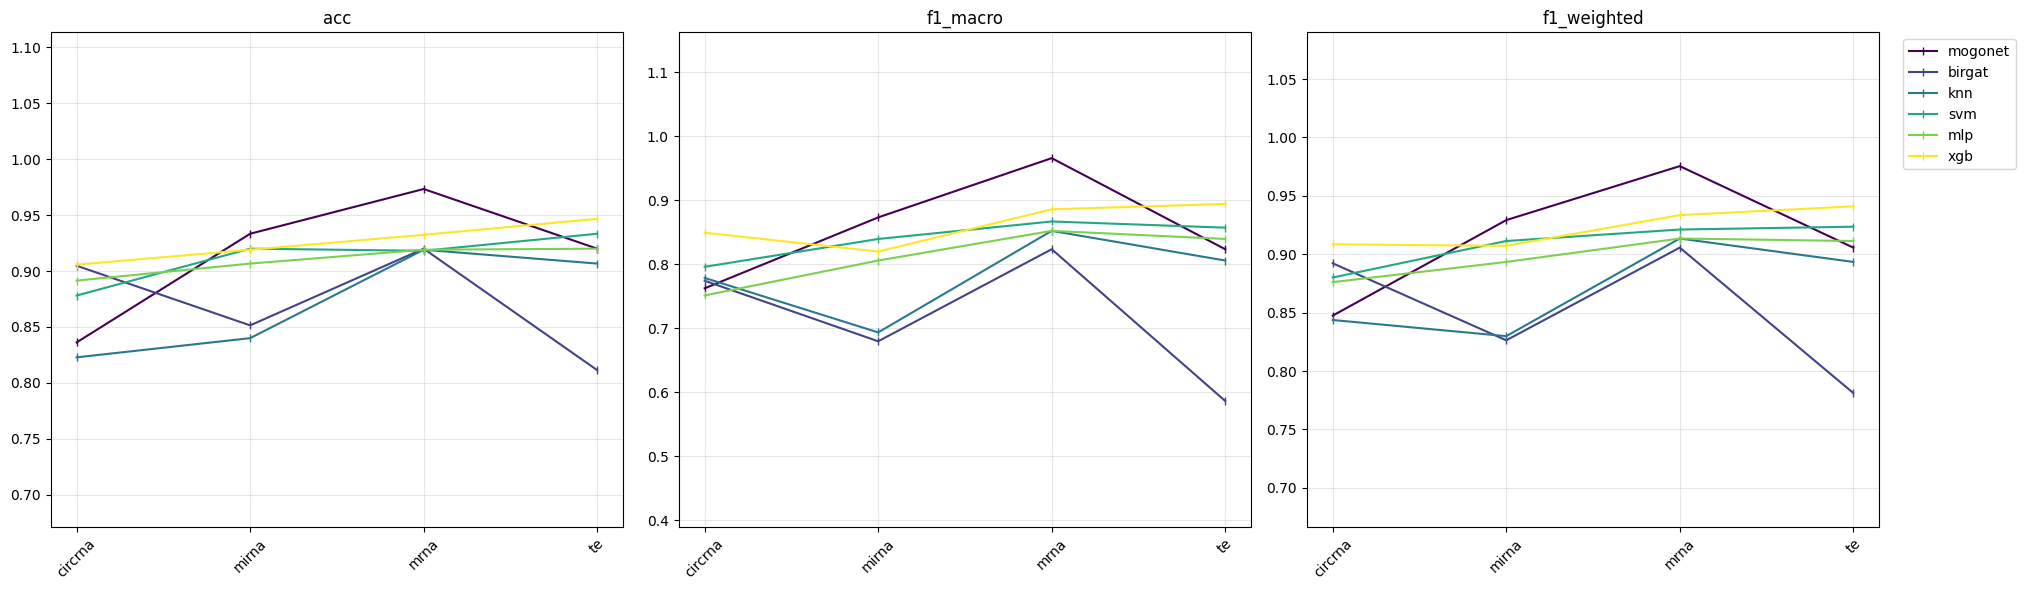

In [74]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

def plot_experiment_metrics(experiment_files: dict):
    metrics = ['acc', 'f1_macro', 'f1_weighted']
    
    # Process each experiment
    results = {}
    first_df = pl.read_csv(next(iter(experiment_files.values())))
    models = first_df['model'].unique().to_list()
    
    # Store results by experiment and model
    for exp_name, file_path in experiment_files.items():
        df = pl.read_csv(file_path)
        results[exp_name] = {}
        for model in models:
            model_data = df.filter(pl.col('model') == model)
            results[exp_name][model] = {
                'means': model_data.select(pl.col(metrics)).mean().to_numpy().flatten(),
                'stds': model_data.select(pl.col([m + '_std' for m in metrics])).mean().to_numpy().flatten()
            }
    
    # Create a plot for each metric
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.subplots_adjust(wspace=0.3)  # Increase space between subplots

    exp_names = list(results.keys())
    x = np.arange(len(exp_names))
    colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
    
    for idx, (metric, ax) in enumerate(zip(metrics, axes)):
        for model_idx, model in enumerate(models):
            metric_values = [results[exp][model]['means'][idx] for exp in exp_names]
            metric_errors = [results[exp][model]['stds'][idx] for exp in exp_names]
            
            # Plot error bars and line
            ax.errorbar(x, metric_values, # yerr=metric_errors,
                       fmt='-', marker='|', capsize=5, label=model,
                       color=colors[model_idx])
        
        ax.set_xticks(x)
        ax.set_xticklabels(exp_names, rotation=45)
        ax.set_title(metric)
        ax.grid(True, alpha=0.3)  # Add light grid
        
        # Set y-axis limits with padding
        all_values = [results[exp][model]['means'][idx] for exp in exp_names for model in models]
        all_errors = [results[exp][model]['stds'][idx] for exp in exp_names for model in models]

        ymin = min(all_values) - max(all_errors)
        ymax = max(all_values) + max(all_errors)
        print(ymin, ymax)
        
        ax.set_ylim(ymin, ymax)
        
        # if idx == 0:  # Only show legend on first plot
        #     ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

        
    ax.legend(bbox_to_anchor=(1.25, 1), loc='upper right')  # Changed from 1.05 to 1.4
    
    plt.tight_layout()
    return fig

experiment_files = {
    'circrna': 'logs/mds_disease/mds_disease_circrna.csv',
    'mirna': 'logs/mds_disease/mds_disease_mirna.csv',
    'mrna': 'logs/mds_disease/mds_disease_mrna.csv',
    'te': 'logs/mds_disease/mds_disease_te.csv'
}

fig = plot_experiment_metrics(experiment_files)
plt.show()